In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential, Functional
from keras.layers import Dense, Dropout, Flatten, Reshape, TimeDistributed, GRU
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras import models, layers, utils, backend as K
from tensorflow.keras.optimizers import Adam, RMSprop

from keras.layers import Input
from keras.layers import Dense
from keras.layers import Concatenate

In [2]:
#labels
LABELS = ['Standing',
          'Sitting',
          'Lying',
          'Squatting',
          'Walking',
          'Bending']

labeldict = {
0 : "Bring",
1 : "Clean Floor",
2 : "Clean Surface",
4 : "Close Door",
5 : "Close Drawer",
6 : "Close Lid By Rotate",
7 : "Close Other Lid",
8 : "Close Small Box",
9 : "Close Tap Water",
10 : "Drink",
11 : "Dry Off Hands",
12 : "Dry Off Hands By Shake",
13 : "Eat Small",
14 : "Gargle",
15 : "Getting Up",
16 : "Hang",
17 : "Lying Down",
18 : "Open Bag",
19 : "Open Big Box",
20 : "Open Door",
21 : "Open Drawer",
22 : "Open Lid By Rotate",
23 : "Open Other Lid",
24 : "Open Small Box",
25 : "Open Tap Water",
26 : "Plug In",
27 : "Press by Grasp",
28 : "Press From Top",
29 : "Press Switch",
30 : "Put From Bottle",
31 : "Put From Tap Water",
32 : "Put High Position",
33 : "Put On Floor",
34 : "Read",
35 : "Rotate",
36 : "Rub Hands",
37 : "Scoop And Put",
38 : "Sitting Down",
39 : "Squatting Down",
40 : "Standing Up",
41 : "Stand Up From Squatting",
42 : "Take From Floor",
43 : "Take From High Position",
44 : "Take Off Jacket",
45 : "Take Out",
46 : "Talk By Telephone",
47 : "Throw Out",
48 : "Throw Out Water",
49 : "Touch Smartphone Screen",
50 : "Type",
51 : "Unhang",
52 : "Unplug",
53 : "Wear Jacket",
54 : "Write"
}

#load data
#training
train_acc = np.load('../data/training/trainAccelerometer.npy')
train_gra = np.load('../data/training/trainGravity.npy')
train_gyr = np.load('../data/training/trainGyroscope.npy')
train_lin = np.load('../data/training/trainLinearAcceleration.npy')

train_mag = np.load('../data/training/trainMagnetometer800.npy')

trainJins_acc = np.load('../data/training/trainJinsAccelerometer800.npy')
trainJins_gyr = np.load('../data/training/trainJinsGyroscope800.npy')

trainMS_acc = np.load('../data/training/trainMSAccelerometer800.npy')
trainMS_gyr = np.load('../data/training/trainMSGyroscope800.npy')

train_label = np.load('../data/training/trainLabels.npy')

#train_data = [train_acc, train_gra, train_gyr, train_lin, train_mag, trainJins_acc, trainJins_gyr, trainMS_acc, trainMS_gyr]

test_acc = np.load('../data/testing/testAccelerometer.npy')
test_gra = np.load('../data/testing/testGravity.npy')
test_gyr = np.load('../data/testing/testGyroscope.npy')
test_mag = np.load('../data/testing/testMagnetometer800.npy')
test_lin = np.load('../data/testing/testLinearAcceleration.npy')

testJins_acc = np.load('../data/testing/testJinsAccelerometer800.npy')
testJins_gyr = np.load('../data/testing/testJinsGyroscope800.npy')

testMS_acc = np.load('../data/testing/testMSAccelerometer800.npy')
testMS_gyr = np.load('../data/testing/testMSGyroscope800.npy')

test_label = np.load('../data/testing/testLabels.npy')

#test_data = [test_acc, test_gra, test_gyr, test_lin, test_mag, testJins_acc, testJins_gyr, testMS_acc, testMS_gyr]

In [3]:
#ToDo: : smartphone/smartwatch placed in the left pocket/on the left arm differences 
#between left and right hand executions for some behavioural activities

In [4]:
#create input feature vector

#train vector
train_data_phone = [train_gyr, train_mag, train_lin]


train_features_phone = np.append(train_acc, train_gra, axis=2)
for i in train_data_phone:
    train_features_phone = np.append(train_features_phone, i, axis=2)
    
train_features_watch = np.append(trainMS_acc, trainMS_gyr, axis=2)
train_features_glasses = np.append(trainJins_acc, trainJins_gyr, axis=2)


print(train_features_watch.shape)
#print(train_features)


#test vector
test_data_phone = [test_gyr, test_mag, test_lin]
test_data_watch = [testMS_acc, testMS_gyr]
test_data_glasses = [testJins_acc, testJins_gyr]


test_features_phone = np.append(test_acc, test_gra, axis=2)
for i in test_data_phone:
    test_features_phone = np.append(test_features_phone, i, axis=2)
    
test_features_watch = np.append(testMS_acc, testMS_gyr, axis=2)
test_features_glasses = np.append(testJins_acc, testJins_gyr, axis=2)

    

print(test_features_phone.shape)
print(test_features_phone.shape[0])
print(test_features_phone.dtype)

#print(test_features[0])

(2284, 800, 6)
(2288, 800, 15)
2288
float32


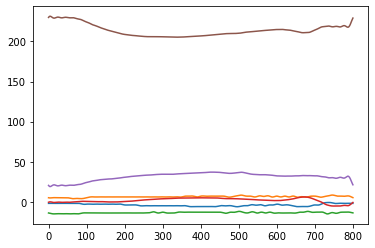

Open Bag


In [5]:
#print(test_label)
#print(train_features)
#all samples of first activity
n = 18
plt.plot(train_features_glasses[n])
plt.show()
print(labeldict[n])

#numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them
#done with one-hot-encoding
y_train_hot = np_utils.to_categorical(train_label, num_classes)
print('New y_train shape: ', y_train_hot.shape)

In [6]:

#number of hidden layer: around (number of inputs + 1)/2

#(input: ?-dimensional vectors) 
#       ↧

#.
#.
#.
#       ↧
#[Dense (1? units, softmax activation)]
#       ↧
#(output: integer for human activity (0-54))

#training data:
X_train_phone = train_features_phone
X_train_watch = train_features_watch
X_train_glasses = train_features_glasses
Y_train = train_label

X_test_phone = test_features_phone
X_test_watch = test_features_watch
X_test_glasses = test_features_glasses
Y_test = test_label

In [7]:
verbose, epochs, batch_size = 2, 100, 64
n_timesteps, n_features, n_outputs = 800, 27, 55

input_phone = Input(shape=(n_timesteps,15), name='phone')
conv1D = Conv1D(filters=100, kernel_size=5, activation='relu')(input_phone)
drop1 = Dropout(0.5)(conv1D)
pool1 = MaxPooling1D(pool_size=5)(drop1)
# model.add(Flatten())
drop2 = Dropout(0.5)(pool1)
conv1D_2 = Conv1D(filters=100, kernel_size=5, activation='relu')(drop2)
dens1 = Dense(8, activation='relu')(conv1D_2)
# drop3 = Dropout(0.5)(dens1)
flatten = Flatten()(dens1)
output_phone = Dense(55, activation='softmax')(flatten)



input_watch = Input(shape=(n_timesteps,6), name='watch')
conv1D_watch = Conv1D(filters=100, kernel_size=5, activation='relu')(input_watch)
drop1_watch = Dropout(0.5)(conv1D_watch)
pool1_watch = MaxPooling1D(pool_size=5)(drop1_watch)
# model.add(Flatten())
drop2_watch = Dropout(0.5)(pool1_watch)
conv1D_watch = Conv1D(filters=100, kernel_size=5, activation='relu')(drop2_watch)
dens1_watch = Dense(8, activation='relu')(conv1D_watch)
# drop3_watch = Dropout(0.5)(dens1_watch)
flatten_watch = Flatten()(dens1_watch)
output_watch = Dense(55, activation='softmax')(flatten_watch)



input_glasses = Input(shape=(n_timesteps,6), name='glasses')
conv1D_glasses = Conv1D(filters=100, kernel_size=5, activation='relu')(input_glasses)
drop1_glasses = Dropout(0.5)(conv1D_glasses)
pool1_glasses = MaxPooling1D(pool_size=5)(drop1_glasses)
# model.add(Flatten())
drop2_glasses = Dropout(0.5)(pool1_glasses)
conv1D_glasses_2 = Conv1D(filters=100, kernel_size=5, activation='relu')(drop2_glasses)
dens1_glasses = Dense(8, activation='relu')(conv1D_glasses_2)
# drop3_glasses = Dropout(0.5)(dens1_glasses)
flatten_glasses = Flatten()(dens1_glasses)
output_glasses = Dense(55, activation='softmax')(flatten_glasses)



combined_models = layers.Concatenate()([output_phone, output_watch, output_glasses])
reshaped = Reshape((55, 3))(combined_models)
conv1D_combined = Conv1D(filters=8, kernel_size=5, activation='relu')(reshaped)
drop1_combined = Dropout(0.5)(conv1D_combined)
flatten = Flatten()(drop1_combined)
output = Dense(55, activation='softmax')(flatten)

model = Functional(inputs=[input_phone, input_watch, input_glasses], outputs=output)

print(model.summary())


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 phone (InputLayer)             [(None, 800, 15)]    0           []                               
                                                                                                  
 watch (InputLayer)             [(None, 800, 6)]     0           []                               
                                                                                                  
 glasses (InputLayer)           [(None, 800, 6)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 796, 100)     7600        ['phone[0][0]']                  
                                                                                              

In [8]:
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy', F1]
)

callbacks_list = [
    #keras.callbacks.ModelCheckpoint(filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', save_best_only=True),
keras.callbacks.EarlyStopping(monitor='loss', patience=3)
]

y_train_hot = np_utils.to_categorical(train_label, 55)
y_test_hot = np_utils.to_categorical(test_label, 55)
print('New y_train shape: ', y_train_hot.shape)


New y_train shape:  (2284, 55)


In [9]:
# run an experiment
def run_experiment():
    # load data
    # repeat experiment
    scores = list()
    
    history = model.fit({"phone": train_features_phone, "watch": train_features_watch, "glasses": train_features_glasses}, y_train_hot, batch_size=16, epochs=400, validation_split=0.2)
    score = model.evaluate({"phone": test_features_phone, "watch": test_features_watch, "glasses": test_features_glasses}, y_test_hot, verbose=2)
    scores.append(score)
    # summarize results
    print("Test loss:", scores[0])
    return history

In [10]:
history = run_experiment()

Epoch 1/400
115/115 [==============================] - 43s 348ms/step - loss: 4.0116 - accuracy: 0.0175 - F1: 0.0000e+00 - val_loss: 4.0061 - val_accuracy: 0.0109 - val_F1: 0.0000e+00
Epoch 2/400
115/115 [==============================] - 38s 333ms/step - loss: 4.0078 - accuracy: 0.0246 - F1: 0.0000e+00 - val_loss: 3.9943 - val_accuracy: 0.0175 - val_F1: 0.0000e+00
Epoch 3/400
115/115 [==============================] - 40s 344ms/step - loss: 3.9990 - accuracy: 0.0241 - F1: 0.0000e+00 - val_loss: 3.9938 - val_accuracy: 0.0219 - val_F1: 0.0000e+00
Epoch 4/400
115/115 [==============================] - 43s 376ms/step - loss: 3.9971 - accuracy: 0.0246 - F1: 0.0000e+00 - val_loss: 3.9943 - val_accuracy: 0.0175 - val_F1: 0.0000e+00
Epoch 5/400
115/115 [==============================] - 52s 451ms/step - loss: 3.9922 - accuracy: 0.0208 - F1: 0.0000e+00 - val_loss: 3.9932 - val_accuracy: 0.0153 - val_F1: 0.0000e+00
Epoch 6/400
115/115 [==============================] - 57s 492ms/step - loss: 3.

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()